In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

In [2]:
%matplotlib inline

In [3]:
maze_values = [[4,5,7,9,10,10,10,11,11,11,14,15],[4,5,6,9,10,10,10,12,13,13,13,16],[3,5,7,9,9,11,11,11,12,14,15,16],
               [3,4,7,8,9,10,10,10,15,14,15,15],[3,4,4,5,8,9,9,16,15,14,15,14],[2,3,3,6,8,17,17,16,14,15,16,13],
               [2,4,4,5,8,18,18,15,14,15,16,13],[2,4,4,6,7,7,7,15,14,15,14,13],[1,4,4,3,8,7,8,8,13,13,13,12],
               [1,2,2,2,5,6,6,9,14,11,11,12],[1,3,4,3,5,7,7,8,11,11,11,12],[0,3,4,4,4,7,7,9,10,10,10,11]]

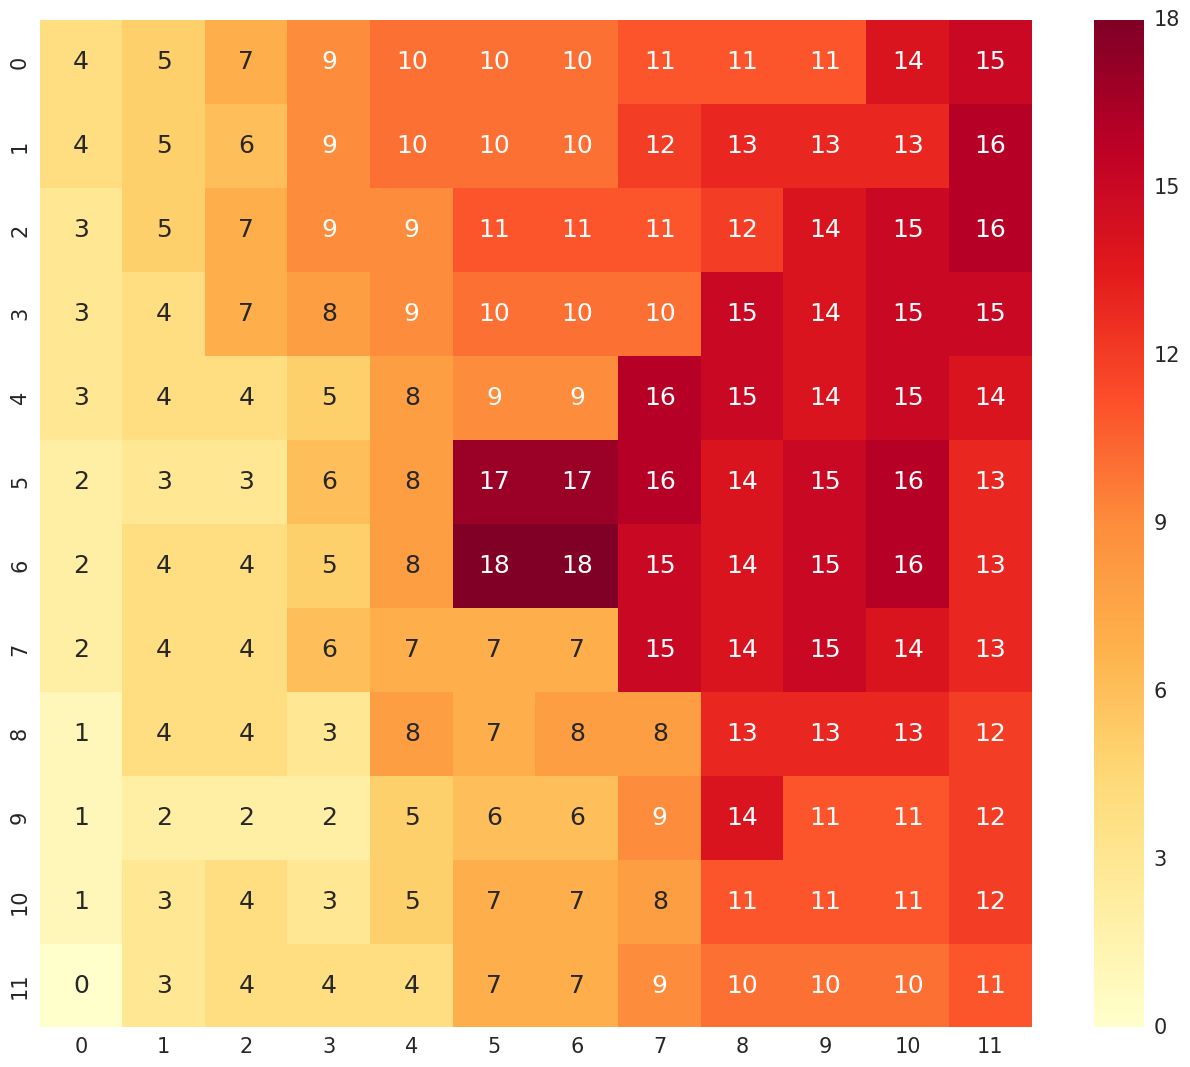

In [4]:
sns.plt.figure(figsize=(16, 13))
sns.set(font_scale=1.5)
sns.heatmap(maze_values, annot=True, cmap='YlOrRd')
plt.show()

In [5]:
maze_values

[[4, 5, 7, 9, 10, 10, 10, 11, 11, 11, 14, 15],
 [4, 5, 6, 9, 10, 10, 10, 12, 13, 13, 13, 16],
 [3, 5, 7, 9, 9, 11, 11, 11, 12, 14, 15, 16],
 [3, 4, 7, 8, 9, 10, 10, 10, 15, 14, 15, 15],
 [3, 4, 4, 5, 8, 9, 9, 16, 15, 14, 15, 14],
 [2, 3, 3, 6, 8, 17, 17, 16, 14, 15, 16, 13],
 [2, 4, 4, 5, 8, 18, 18, 15, 14, 15, 16, 13],
 [2, 4, 4, 6, 7, 7, 7, 15, 14, 15, 14, 13],
 [1, 4, 4, 3, 8, 7, 8, 8, 13, 13, 13, 12],
 [1, 2, 2, 2, 5, 6, 6, 9, 14, 11, 11, 12],
 [1, 3, 4, 3, 5, 7, 7, 8, 11, 11, 11, 12],
 [0, 3, 4, 4, 4, 7, 7, 9, 10, 10, 10, 11]]

In [8]:
twelve_df = pd.read_csv('./generated_mazes/12x12_batch_maze_runner_results.txt')
fourteen_df = pd.read_csv('./generated_mazes/14x14_batch_maze_runner_results.txt')
sixteen_df = pd.read_csv('./generated_mazes/16x16_batch_maze_runner_results.txt')
eighteen_df = pd.read_csv('./generated_mazes/18x18_batch_maze_runner_results.txt')
twenty_df = pd.read_csv('./generated_mazes/20x20_batch_maze_runner_results.txt')

In [9]:
frames = [twelve_df, fourteen_df, sixteen_df, eighteen_df, twenty_df]
results_df = pd.concat(frames, ignore_index=True).drop(['file_name'], axis=1)

In [10]:
results_df = results_df.rename(columns=lambda x: x.strip())

In [11]:
results_df[results_df['score'] > 1000].count()

maze_dim           13
upper_benchmark    13
lower_benchmark    13
score              13
dtype: int64

In [12]:
completed_results = results_df[results_df['score'] < 1000]

In [13]:
completed_results.describe()

,maze_dim,upper_benchmark,lower_benchmark,score
count,487.000000,487.000000,487.000000,487.000000
mean,15.930185,28.227652,19.502943,16.707105
std,2.826108,7.931984,5.209778,5.787204
min,12.000000,14.600000,9.800000,5.400000
25%,14.000000,21.066667,15.533333,12.183500
50%,16.000000,27.066667,19.533333,16.100000
75%,18.000000,34.600000,23.433333,20.633500
max,20.000000,46.666667,33.333333,33.867000


In [14]:
completed_results.loc[:,'score_less_lb'] = pd.Series(completed_results['score'] - completed_results['lower_benchmark'])
completed_results.loc[:,'score_less_ub'] = pd.Series(completed_results['score'] - completed_results['upper_benchmark']) 

/home/joaquin/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/joaquin/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
completed_results.groupby('maze_dim').describe()

lower_benchmark       score  score_less_lb  score_less_ub  \
maze_dim                                                                    
12       count       100.000000  100.000000     100.000000     100.000000   
         mean         14.030000   12.266630      -1.763370      -6.563370   
         std           2.933109    3.449734       1.382922       1.382922   
         min           9.800000    5.400000      -4.400000      -9.200000   
         25%          11.800000    9.858250      -2.641500      -7.441500   
         50%          13.800000   11.850000      -1.583500      -6.383500   
         75%          15.800000   14.666750      -0.800000      -5.600000   
         max          23.800000   22.133000       2.500000      -2.300000   
14       count       100.000000  100.000000     100.000000     100.000000   
         mean         16.003333   13.532310      -2.471023      -9.004357   
         std           2.622571    3.937888       2.118553       2.118553   
         min          10.533333    6.567000      -5.966333     -12.499667   
         25%          13.533333   10.208250      -4.466333     -10.999667   
         50%          15.533333   13.833500      -2.449833      -8.983167   
         75%          17.533333   16.375000      -0.891833      -7.425167   
         max          23.533333   22.800000       2.599667      -3.933667   
16       count        98.000000   98.000000      98.000000      98.000000   
         mean         19.165986   16.397265      -2.768721     -11.302054   
         std           2.937099    4.511382       2.640364       2.640364   
         min          14.533333    6.900000      -7.833333     -16.366667   
         25%          16.783333   13.999750      -4.558083     -13.091417   
         50%          18.533333   16.316500      -2.233333     -10.766667   
         75%          20.533333   19.125250      -0.825333      -9.358667   
         max          30.533333   28.233000       2.899667      -5.633667   
18       count        95.000000   95.000000      95.000000      95.000000   
         mean         22.536842   19.064895      -3.471947     -14.271947   
         std           2.593816    4.589823       2.946785       2.946785   
         min          16.800000    8.367000      -9.867000     -20.667000   
         25%          20.800000   15.700000      -5.750000     -16.550000   
         50%          21.800000   19.433000      -2.800000     -13.600000   
         75%          23.800000   22.366500      -1.600000     -12.400000   
         max          31.800000   32.600000       2.200000      -8.600000   
20       count        94.000000   94.000000      94.000000      94.000000   
         mean         26.333333   22.748606      -3.584727     -16.918060   
         std           2.739594    5.349062       3.975069       3.975069   
         min          19.333333    7.267000     -12.233333     -25.566667   
         25%          24.333333   19.733500      -5.808333     -19.141667   
         50%          26.333333   23.266500      -2.816333     -16.149667   
         75%          28.333333   26.416500      -1.074833     -14.408167   
         max          33.333333   33.867000       4.033667      -9.299667   

                upper_benchmark  
maze_dim                         
12       count       100.000000  
         mean         18.830000  
         std           2.933109  
         min          14.600000  
         25%          16.600000  
         50%          18.600000  
         75%          20.600000  
         max          28.600000  
14       count       100.000000  
         mean         22.536667  
         std           2.622571  
         min          17.066667  
         25%          20.066667  
         50%          22.066667  
         75%          24.066667  
         max          30.066667  
16       count        98.000000  
         mean         27.699320  
         std           2.937099  
         min          23.066667  
         25%          25.316667  

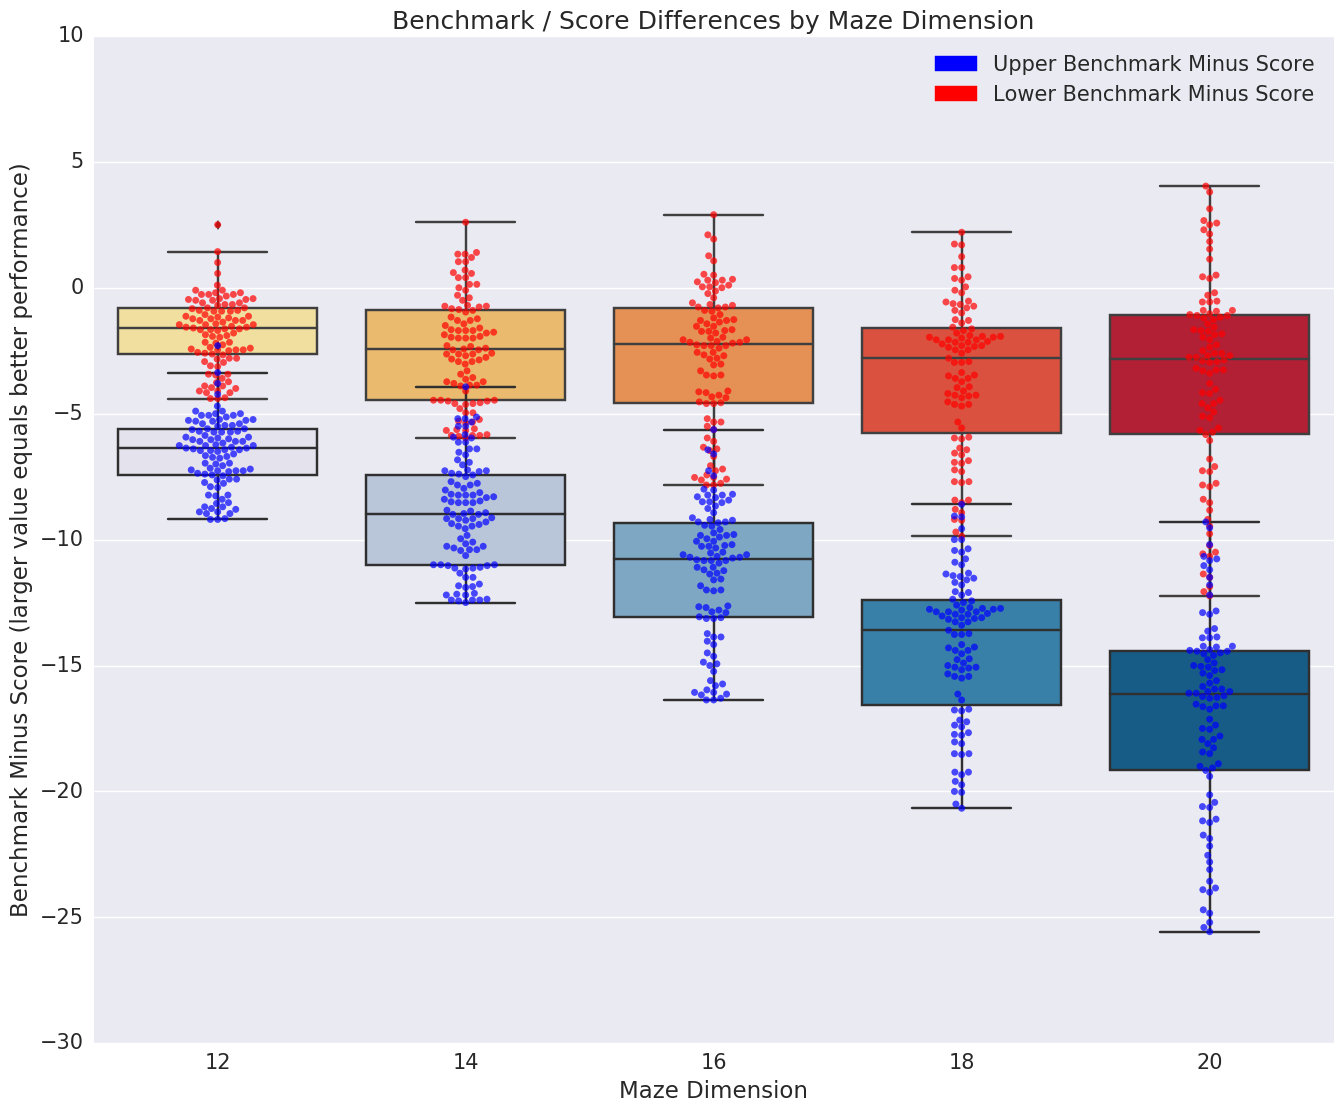

In [19]:
import matplotlib.patches as mpatches

sns.plt.figure(figsize=(16, 13))
sns.set(font_scale=1.5)
red_patch = mpatches.Patch(color='red', label='Lower Benchmark Minus Score')
blue_patch = mpatches.Patch(color='blue', label='Upper Benchmark Minus Score')
ax = sns.boxplot(x="maze_dim", y="score_less_lb", data=completed_results, palette='YlOrRd')
ax = sns.boxplot(x="maze_dim", y="score_less_ub", data=completed_results, palette='PuBu')
ax = sns.swarmplot(x="maze_dim", y="score_less_lb", data=completed_results, color='red', alpha='.7')
ax = sns.swarmplot(x="maze_dim", y="score_less_ub", data=completed_results, color='blue', alpha='.7')
ax.set_title('Benchmark / Score Differences by Maze Dimension')
ax.set_xlabel('Maze Dimension')
ax.set_ylabel('Benchmark Minus Score (larger value equals better performance)')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

In [21]:
completed_results[completed_results['score_less_lb'] > 0].count()

maze_dim           58
upper_benchmark    58
lower_benchmark    58
score              58
score_less_lb      58
score_less_ub      58
dtype: int64

In [22]:
completed_results.describe()

,maze_dim,upper_benchmark,lower_benchmark,score,score_less_lb,score_less_ub
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,15.930185,28.227652,19.502943,16.707105,-2.795838,-11.520548
std,2.826108,7.931984,5.209778,5.787204,2.801683,4.569653
min,12.000000,14.600000,9.800000,5.400000,-12.233333,-25.566667
25%,14.000000,21.066667,15.533333,12.183500,-4.316667,-14.516333
50%,16.000000,27.066667,19.533333,16.100000,-2.300333,-10.900000
75%,18.000000,34.600000,23.433333,20.633500,-0.933000,-8.033667
max,20.000000,46.666667,33.333333,33.867000,4.033667,-2.300000
